In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import norm
import matplotlib.colors as mcolors

from toolbox.exact_barycenter import *
from toolbox.pga import *
from toolbox.tools_signal import *


import ot

matplotlib.rcParams.update({'font.size': 20, 'legend.fontsize': 20})
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Principal geodesic analysis for Gaussian Distributions

********** Dataset and true barycenter **********


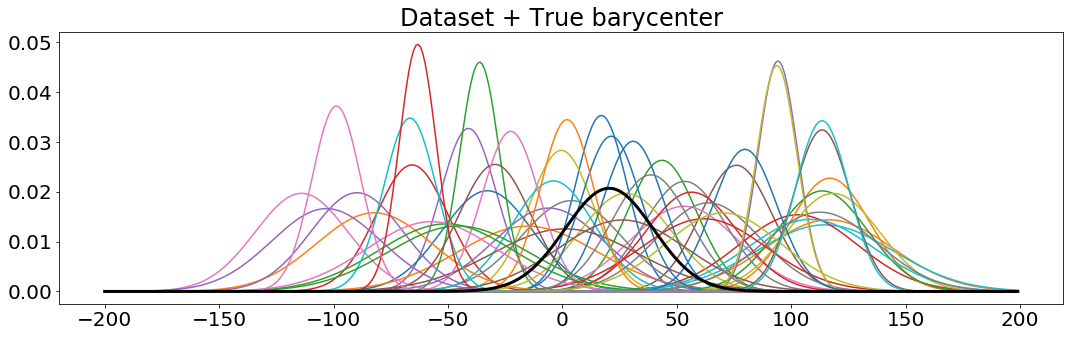

********** Euclidean PCA directly on the dataset **********


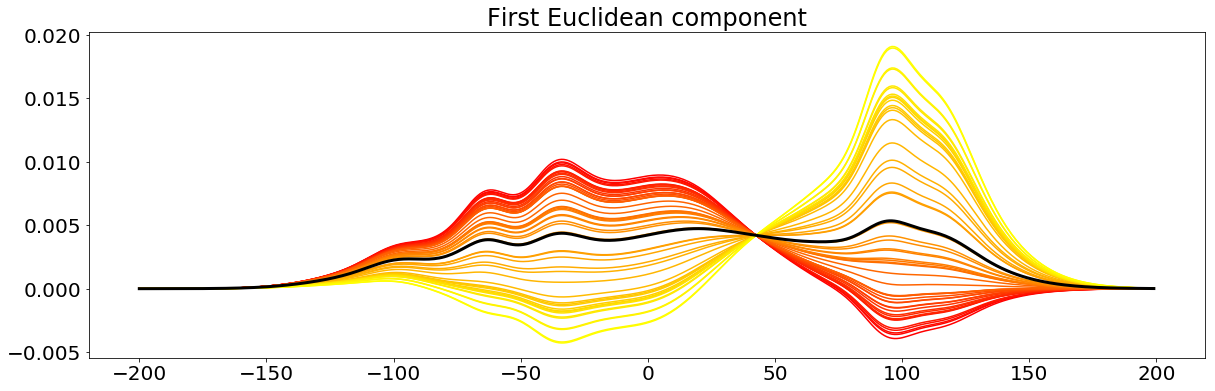

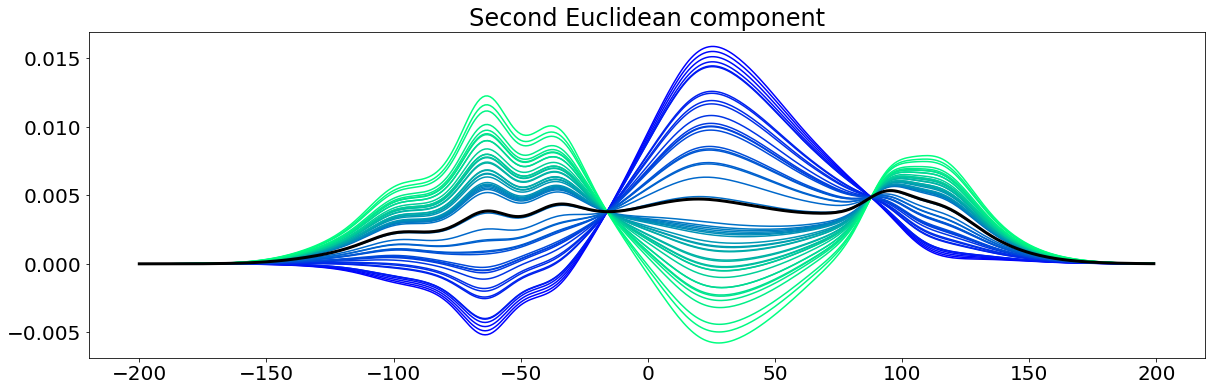

********** Geodesic PCA on the log-map **********


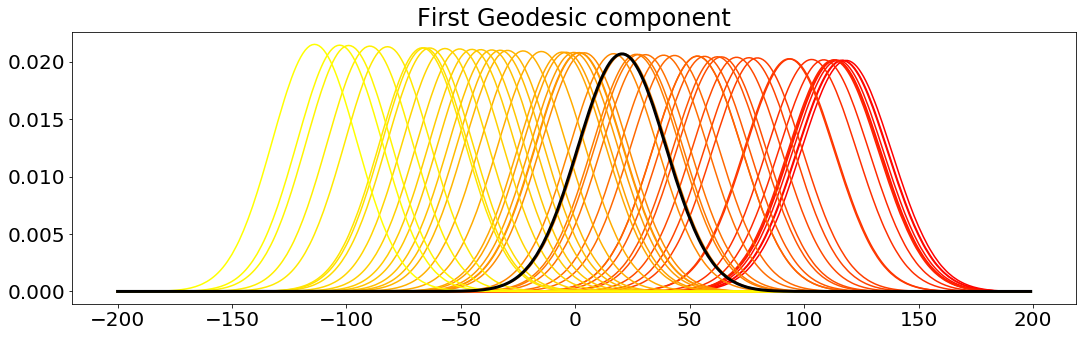

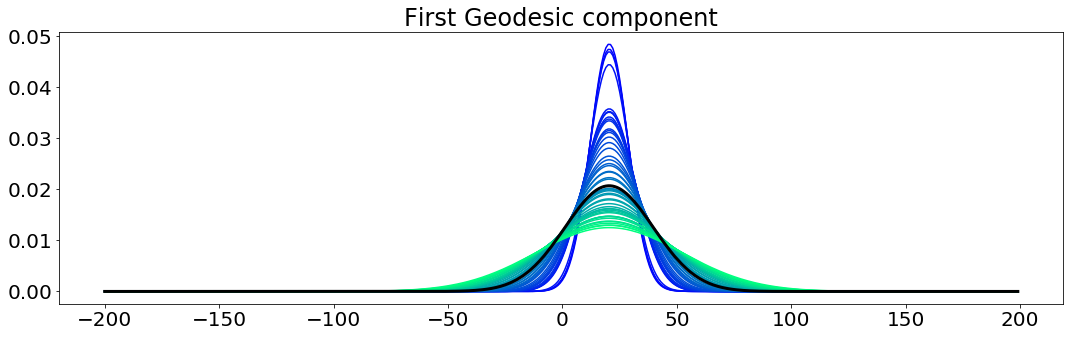

In [4]:
#########################################################
###################### SET DATA #########################
#########################################################

print('********** Dataset and true barycenter **********')


Omega = np.arange(-200,200)
n = 50 # Number of observations (ie histograms)

param = np.zeros((n,2))
param[:,0] = np.random.uniform(-120,120,n)
param[:,1] = np.random.uniform(1,4,n)

m = 0
sigma = 8

# Matrix of the data
mu = np.zeros((n,len(Omega)))
for j in np.arange(n):
    mu[j,:] = norm.pdf(Omega,m+param[j,0],sigma*param[j,1])
    mu[j,:] /= np.sum(mu[j,:])
    
plt.figure(figsize=(18,5))
moy_tb = np.mean(m+param[:,0])
s_tb = np.mean(sigma*param[:,1])
tb = norm.pdf(Omega,moy_tb,s_tb) # True Wasserstein barycenter (closed form for gaussian measures)
for j in np.arange(n):
    plt.plot(Omega,mu[j,:])
plt.plot(Omega, tb, color = 'black', linewidth = 3)
plt.title('Dataset + True barycenter')
plt.show()


#########################################################
############# Compute euclidean PCA on data #############
#########################################################


print('********** Euclidean PCA directly on the dataset **********')

Dc = np.mean(mu,0)
Dp = mu-Dc # centering the data
D = np.matmul(Dp.T,Dp)/np.size(Dp,0) # covariance matrix
eigValsD, eigD = la.eig(D) # perform euclidean PCA
eigValsD = np.diag(eigValsD.real)
eigD = eigD.real

tD = np.matmul(mu-Dc,eigD)

map1 = matplotlib.cm.get_cmap('autumn',n)
map2 = matplotlib.cm.get_cmap('winter',n)

## First Euclidean component
euc1 = np.zeros((n,len(Omega))) 
I1 = np.argsort(tD[:,0])
plt.figure(figsize=(20,6))
for i in np.arange(n):
    euc1[i,:] = Dc + tD[I1[i],0]*eigD[:,0]
    plt.plot(Omega,euc1[i,:],color = map1(i))
plt.plot(Omega,Dc,linewidth= 3, color = 'black')
plt.title('First Euclidean component')
plt.show()

## Second Euclidean component
euc2 = np.zeros((n,len(Omega))) 
I2 = np.argsort(tD[:,1])
plt.figure(figsize=(20,6))
for i in np.arange(n):
    euc2[i,:] = Dc + tD[I2[i],1]*eigD[:,1]
    plt.plot(Omega,euc2[i,:],color = map2(i))
plt.plot(Omega,Dc,linewidth= 3, color = 'black')
plt.title('Second Euclidean component')
plt.show()

#########################################################
############# Compute GEODESIC PCA on data ##############
#########################################################

print('********** Geodesic PCA on the log-map **********')


bar, tV, eigV, Vc = perform_GPCA(mu, Omega, n)


## First Geodesic component
geo1 = np.zeros((n,len(Omega))) 
I1 = np.argsort(tV[:,0])
plt.figure(figsize=(18,5))
for i in np.arange(n):
    TV = Omega+Vc+tV[I1[i],0]*eigV[:,0]
    geo1[i,:] = pushforward_density(TV, bar, Omega)
    plt.plot(Omega,geo1[i,:],color = map1(i))
plt.plot(Omega,bar,linewidth= 3, color = 'black')
plt.title('First Geodesic component')
plt.show()
    
## Second Geodesic component
geo2 = np.zeros((n,len(Omega))) 
I2 = np.argsort(tV[:,1])
plt.figure(figsize=(18,5))
for i in np.arange(n):
    TV = Omega+Vc+tV[I2[i],1]*eigV[:,1]
    geo2[i,:] = pushforward_density(TV, bar, Omega)
    plt.plot(Omega,geo2[i,:],color = map2(i))
plt.plot(Omega,bar,linewidth= 3, color = 'black')
plt.title('First Geodesic component')
plt.show()   
    

# Principal geodesic analysis for Fungi Dataset

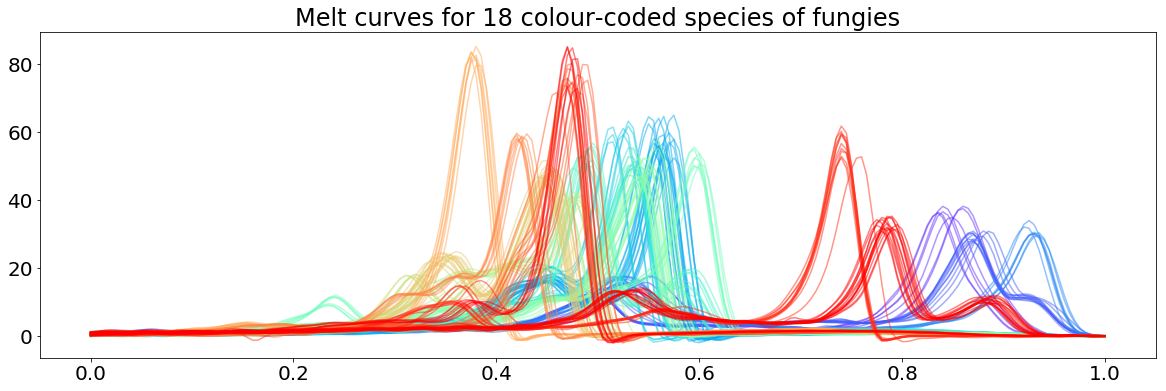

In [5]:
n = 186

new_data = np.zeros((n,202))
with open("data/Fungi_TEST.tsv") as f:
    lines = f.read().split('\n')[:-1]
    for i, line in enumerate(lines):
        if i == 0: # header
            new_data[i,:] = line.split()
        else:
            new_data[i,:] = line.split()

fungi = new_data[:,0]
sig = np.delete(new_data, 0, 1)

times = np.linspace(0,1,201)
frequencies = np.linspace(-100,100, 2001)

psd = np.zeros((n,len(frequencies)))

for j in np.arange(n):
    psd[j,:] = Signal2NPSD(frequencies, times, sig[j,:])
    
mapp = matplotlib.cm.get_cmap('rainbow',18)

plt.figure(figsize=(20,6))
for j in np.arange(n):
    plt.plot(times,sig[j,:], color = mapp(np.int(fungi[j])), alpha = 0.5)
plt.title('Melt curves for 18 colour-coded species of fungies')
plt.show()


Text(0.5,1,'Values of the projection locations for the first and second geodesic component')

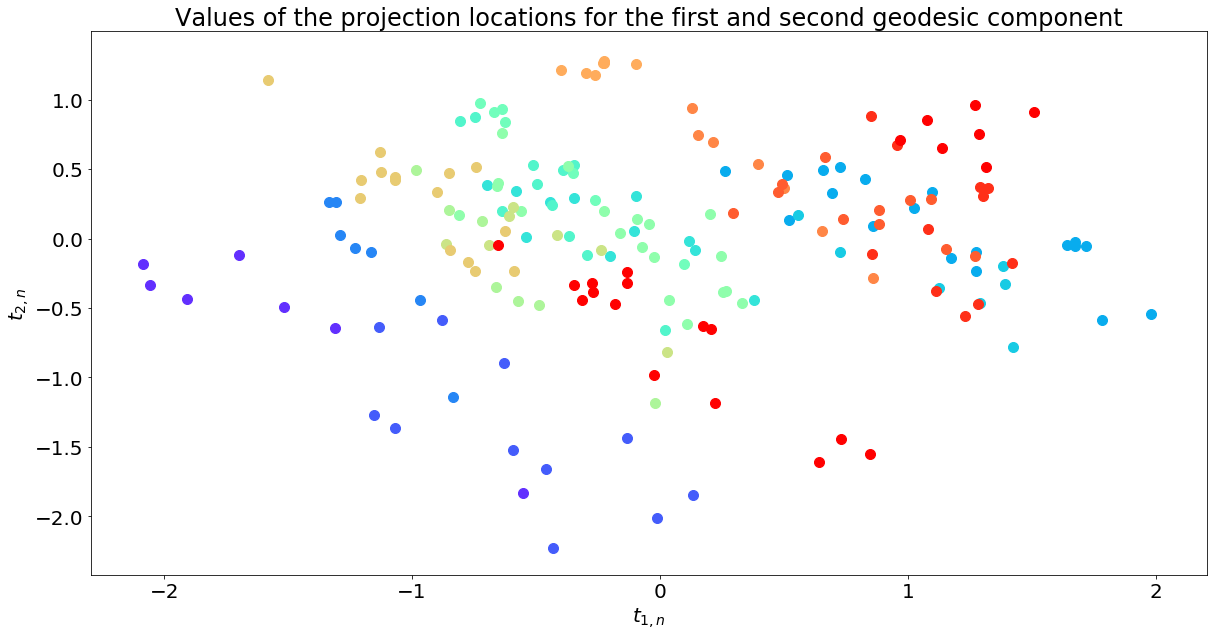

In [6]:
####################################################################
############# Compute GEODESIC PCA on Fungies dataset ##############
####################################################################

bar, values_proj, eigenvectors, mean_matrix = perform_GPCA(psd, frequencies, n)

plt.figure(figsize=(20,10))
for j in np.arange(n):
    plt.scatter(values_proj[j,0],values_proj[j,1], color = mapp(np.int(fungi[j])), s = 100)
plt.xlabel('$t_{1,n}$')
plt.ylabel('$t_{2,n}$')
plt.title('Values of the projection locations for the first and second geodesic component')
